## Building Neural networks from scratch


### importing dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import dictionary_to_vector, vector_to_dictionary

### building a toy dataset

In [2]:
X = np.random.randn(2,50)
y = X[0,:] * 8 + X[1,:] * 5 + 3
X, y

(array([[ 0.2302586 ,  0.98294761,  1.31128075, -1.12182841,  0.83843214,
          1.57655699, -0.53047517,  0.44931875,  0.84361701,  1.5063021 ,
         -0.46795129, -0.923719  , -0.35648465,  0.08237828,  0.37128483,
         -0.31276731, -0.6011687 ,  0.19859087, -0.82642494, -0.21482989,
          2.33566154,  0.42665084,  1.6459717 ,  1.0989447 ,  0.4416971 ,
          0.22153134,  1.53567855, -0.84273795,  0.69342721, -0.91079734,
          1.02930076,  0.9768837 ,  1.7372833 , -1.03465644, -1.05747867,
          0.77421926, -0.01807498, -0.90690056, -0.7079184 , -1.51012943,
          0.01766221,  1.34721175,  1.99310194, -0.24919523,  0.74371587,
          0.13173812, -0.60422405,  1.13257483,  0.05927145, -1.07959204],
        [-0.08133031,  0.44357861,  1.08227925, -0.27928983,  0.5524044 ,
         -0.18404844, -1.19045726,  1.30546152,  0.48546004,  0.03717439,
          0.75558982,  0.21211745, -0.38934474, -0.01797412, -1.40822148,
          1.56927935,  1.14262522,  0

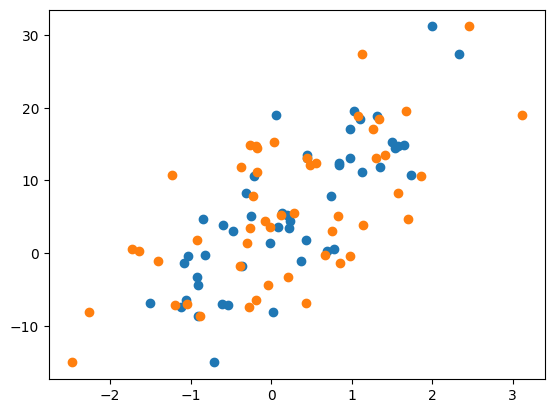

In [3]:
plt.scatter(x=X[0,:],y=y)
plt.scatter(x=X[1,:],y=y)

### Building neural network with one hidden layer

In [4]:
def initialize_parameters(n_in, n_h, n_out):
    """
    initializes model parameters.

    Arguments:
    n_in: number of input units
    n_h: number of hidden units
    n_out: number of output units

    Return:
    parameters: dictionary of all the randomly intialized parameters
    
    """

    np.random.seed(42)

    W1 = np.random.rand(n_h, n_in)
    b1 = np.random.rand(n_h, 1)
    W2 = np.random.rand(n_out, n_h)
    b2 = np.random.rand(n_out, 1)

    parameters = {"W1":W1,
                  "b1":b1,
                  "W2":W2,
                  "b2":b2}
    
    return parameters

In [5]:
def forward_propagation(X, parameters):
    """
    Arguments:
    X: input data of shape (n_x, m)
    parameters: randomly initialized model parameters

    Return:
    A2 = sigmoid output of second activation
    cache = dictionary of Z1, A1, Z2 and A2
    """
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Forward pass
    Z1 = W1 @ X
    A1 = np.tanh(Z1)
    Z2 = W2 @ A1
    A2 = Z2

    cache = {"Z1":Z1,
             "A1":A1,
             "Z2":Z2,
             "A2":A2}

    return A2, cache

In [6]:
def compute_loss(A2, Y):
    """
    compute Mean Squared Error loss of the model
    Arguments:
    A2: Prediction of the model
    Y: "true" label vactor of shape (1, number of samples)

    Return:
    loss: computed scalar loss of the model
    """

    m = len(Y)
    loss = 1/m * np.sum((A2 - Y) ** 2)
    return loss

In [7]:
def backward_propagation(parameters, cache, X, Y):
    """ computes gradient of the model parameters
    
    Arguments:
    parameters: dictionary of the parameters of the model
    cache: a dictionary containing Z1, A1, Z2 and A2
    X: input data of shape (2, number of example)
    Y: "true" label vector of shape (1, number of example)
    
    Return:
    grad: dictionary of the gradients of each model parameters
    """

    m = len(Y)
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    Z1 = cache["Z1"]
    A1 = cache["A1"]
    Z2 = cache["Z2"]
    A2 = cache["A2"]

    # Backpropagation
    dA2 = (2/m) * (A2 - Y) # (1, m)
    dZ2 = dA2 # (1,m)
    dW2 = dZ2 @ A1.T #(1, n_h)
    db2 = np.sum(dZ2, axis=1, keepdims=True) # (1,1)
    dA1 = W2.T @ dZ2 # (n_h, m)
    dZ1 = dA1 * (1 - np.power(A1,2)) # (n_h, m)
    dW1 = dZ1 @ X.T # (n_h, n_in)
    db1 = np.sum(dZ1, axis=1, keepdims=True) # (1, n_h)

    grads = {"dW1":dW1,
            "db1":db1,
            "dW2":dW2,
            "db2":db2}

    return grads

In [8]:
parameters = initialize_parameters(2, 4, 1)
parameters

{'W1': array([[0.37454012, 0.95071431],
        [0.73199394, 0.59865848],
        [0.15601864, 0.15599452],
        [0.05808361, 0.86617615]]),
 'b1': array([[0.60111501],
        [0.70807258],
        [0.02058449],
        [0.96990985]]),
 'W2': array([[0.83244264, 0.21233911, 0.18182497, 0.18340451]]),
 'b2': array([[0.30424224]])}

In [9]:
A2, cache = forward_propagation(X, parameters)
A2

array([[ 0.02652253,  0.82426952,  1.1580249 , -0.74988482,  0.85456342,
         0.51923194, -1.08565359,  1.10841013,  0.81254385,  0.68341598,
         0.54570439, -0.22183   , -0.56825554,  0.02181844, -0.98548684,
         1.05721161,  0.78228632,  0.23922513,  0.3083675 ,  1.15028895,
         1.24595646, -0.68997767,  0.47158643,  1.19334412,  1.13531158,
        -0.17728421,  0.51271118,  0.98397297, -0.9999491 , -1.03830125,
         1.23930823,  1.16588806, -0.41332852,  0.49714063, -0.66205509,
        -1.010984  , -0.33786636, -0.4630719 , -1.29091155, -0.25406725,
        -1.23234709,  0.2388761 ,  1.32846405,  0.69054682,  0.1205772 ,
         0.36887219, -1.04610035,  0.35584409,  1.29671043,  0.36101256]])

In [10]:
loss = compute_loss(A2, y)
loss

117.65663882724962

In [11]:
grads = backward_propagation(parameters=parameters, cache=cache, X=X, Y=y)
grads

{'dW1': array([[-6.30152107, -0.6480525 ],
        [-1.06050329, -0.45643699],
        [-2.74719164, -2.21418136],
        [-1.79336237, -0.46660473]]),
 'db1': array([[-4.13447802],
        [-0.9257509 ],
        [-1.87152279],
        [-1.13217482]]),
 'dW2': array([[-10.96429014, -12.8063144 ,  -4.77885803,  -8.07653343]]),
 'db2': array([[-11.57698194]])}

In [12]:
## manual gradient check
## lets check the gradient calculation of W1[0][0]
## making a copy of parameters
import copy

check_params = copy.deepcopy(parameters)

## nudging the W[0][0] parameter by 0.00000001
check_params["W1"][0][0] = check_params["W1"][0][0] + 0.00000001

## forward pass and loss
check_A2, check_cache = forward_propagation(parameters=check_params, X=X)
check_loss = compute_loss(A2=check_A2, Y=y)

# manually computing gradient of parameter W[0][0]
gradient = (check_loss - loss)/ 0.00000001

print(f"Numerically approximated gradient of the parameter W[0][0] is:{gradient}")
print(f"Gradient of W[0][0] calculated by backprop: {grads['dW1'][0][0]}")
print(gradient - grads['dW1'][0][0])

Numerically approximated gradient of the parameter W[0][0] is:-6.3015221485329675
Gradient of W[0][0] calculated by backprop: -6.301521069526943
-1.0790060249732392e-06


In [21]:

def check_grads(parameters=parameters, grads=grads):
    """
    check the calculated gradients are correct
    """
    eps = 0.00000001
    params_theta = {}

    
    # convert parameter dictionary to a single vector
    param_vector = dictionary_to_vector(parameters=parameters)
    grad_vector = dictionary_to_vector(grads)
    gradapprox = np.zeros(grad_vector.shape)
    print(param_vector.shape[1])

    for i in range(param_vector.shape[1]):
        theta_minus = np.copy(param_vector)
        theta_minus[0][i] -= eps
        theta_plus = np.copy(param_vector)
        theta_plus[0][i] += eps
        # print(theta_minus[0][i], theta_plus[0][i])
        ## convert theta_minus and theta_plus vector to dictionary
        theta_minus = vector_to_dictionary(vector=theta_minus[0], parameters=parameters)
        theta_plus = vector_to_dictionary(vector=theta_plus[0], parameters=parameters)
        ## TODO: forward pass and calculate loss
        pred_minus = forward_propagation(X=X, parameters=theta_minus)
        loss_minus = compute_loss(A2=pred_minus[0], Y=y)
        pred_plus = forward_propagation(X=X, parameters=theta_plus)
        loss_plus = compute_loss(A2=pred_plus[0], Y=y)
        ## TODO: calculate gradient manually
        gradapprox[0][i] = (loss_plus - loss_minus)/(2 * eps)
        
    ## TODO: check difference between manualy calculated gradient and gradients calculated using backpropagation
    numerator = np.linalg.norm(grad_vector - gradapprox)
    denominator = np.linalg.norm(grad_vector) + np.linalg.norm(gradapprox)
    difference = numerator/denominator
    print(gradapprox, grad_vector)
    print(difference)
    if difference > 2e-7:
        print ("\033[93m" + "There is a mistake in the backward propagation! difference = " + str(difference) + "\033[0m")
    else:
        print ("\033[92m" + "Your backward propagation works perfectly fine! difference = " + str(difference) + "\033[0m")
    

check_grads(parameters = parameters, grads=grads)

17
[[ 1.90306362e-09  1.73385797e-08  1.98857386e-08 -1.73304731e-08
   1.70379670e-08  1.78471633e-08 -1.83576772e-08  1.84628535e-08
   1.66644001e-08  1.87672820e-08  7.26103933e-09 -9.64354718e-09
  -1.13929793e-08  8.92259482e-10 -1.58229243e-08  1.70661352e-08
   1.16205050e-08  5.30534433e-09  8.13588474e-10  1.84790065e-08
   2.05658917e-08 -1.02156559e-08  1.78208448e-08  1.97288463e-08
   1.87116571e-08 -1.70527531e-09  1.75271828e-08  1.55779443e-08
  -1.59072011e-08 -1.86984170e-08  1.98150061e-08  1.95044856e-08
   5.83556703e-10  4.10283918e-09 -1.62067355e-08 -1.61125888e-08
  -5.89239485e-09 -1.30383374e-08 -1.99007690e-08 -1.41275756e-08
  -1.94499070e-08  1.27692148e-08  2.00414907e-08  1.07927982e-08
   6.79372913e-09  7.05642633e-09 -1.81190929e-08  1.30313276e-08
   1.99033252e-08  7.42224837e-10]]
[[ 1.77658180e-09  1.69876504e-08  1.98692334e-08 -1.64842628e-08
   1.69391310e-08  1.44224745e-08 -1.81947351e-08  1.81630275e-08
   1.64988940e-08  1.63833005e-08  6.

In [14]:
parameters

{'W1': array([[0.37454012, 0.95071431],
        [0.73199394, 0.59865848],
        [0.15601864, 0.15599452],
        [0.05808361, 0.86617615]]),
 'b1': array([[0.60111501],
        [0.70807258],
        [0.02058449],
        [0.96990985]]),
 'W2': array([[0.83244264, 0.21233911, 0.18182497, 0.18340451]]),
 'b2': array([[0.30424224]])}

In [15]:
loss, check_loss

(117.65663882724962, 117.6566387642344)